<a href="https://colab.research.google.com/github/rasmipaul/FoodHub-Data-Analysis/blob/main/pyf_project_learnernotebook_fullcode_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
files.download('/content/PYF_Project_LearnerNotebook_FullCode_(1)_html.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: Cannot find file: /content/PYF_Project_LearnerNotebook_FullCode_(1)_html.ipynb

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 13.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.2 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.6 requires matplotlib

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
from google.colab import files

# Upload file
uploaded = files.upload()





Saving foodhub_order.csv to foodhub_order.csv


In [ ]:
#from google.colab import drive
 #drive.mount('/content/drive')

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
#from google.colab import drive
#drive.mount('/content/foodhub_order.csv')

In [ ]:
# Write your code here to read the data
import pandas as pd
foodhub = pd.read_csv("foodhub_order.csv")
foodhub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to view the first 5 rows
print(foodhub.head())

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
foodhub.shape

(1898, 9)

#### Observations:
Its giving us the total numbers of ROWS and COLUMNS in dataset

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
foodhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The type of the DataFrame and index range.
The total number of entries (rows).
The number of columns and their names.
How many non-null values each column has.
The data type of each column.
The memory usage of the DataFrame.
This method is very useful for quickly understanding the structure of the dataset and checking for null values.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
# Checking each column one by one to check is there any missing data

#foodhub['order_id'].unique()        ( '...'   missing data from order_id)
#foodhub['customer_id'].unique()       ( '...'   missing data from customer_id)
#foodhub['restaurant_name'].unique()    ('\x8c_¤¾Ñ¼  , \x8e_À\x8eü£¾÷´"  looks like different script(language)) will not consider as missing value
#foodhub['cuisine_type'].unique()
#foodhub['cost_of_the_order'].unique()
#foodhub['day_of_the_week'].unique()
#foodhub['rating'].unique()
#foodhub['food_preparation_time'].unique()   (datas are in integer format )
#foodhub['delivery_time'].unique()            (datas are in integer format)

# checking for missing data
print(foodhub.isnull().sum())

# using the method to replace missing data
foodhub['order_id'] = foodhub['order_id'].fillna(foodhub['order_id'].mean())
foodhub['customer_id'] = foodhub['customer_id'].fillna(foodhub['customer_id'].mean())





order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
This information is useful for data cleaning and preprocessing tasks, as it helps to identify which columns need handling for missing data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here

min_time = foodhub['food_preparation_time'].min()
avg_time = foodhub['food_preparation_time'].mean()
max_time = foodhub['food_preparation_time'].max()

print(f"Minimum Preparation Time: {min_time} minutes")
print(f"Average Preparation Time: {avg_time} minutes")
print(f"Maximum Preparation Time: {max_time} minutes")


Minimum Preparation Time: 20 minutes
Average Preparation Time: 27.371970495258168 minutes
Maximum Preparation Time: 35 minutes


#### Observations:
helps us to find out minimum, mean and maximum valur from the dataset



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
unrated_orders = foodhub[foodhub['rating'] == 'Not given']
num_unrated_orders = len(unrated_orders)

print(f"Number of orders not rated: {num_unrated_orders}")

Number of orders not rated: 736


#### Observations:
its diiging the dataset and giving th total numbers of not rated orders from the housands of data.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

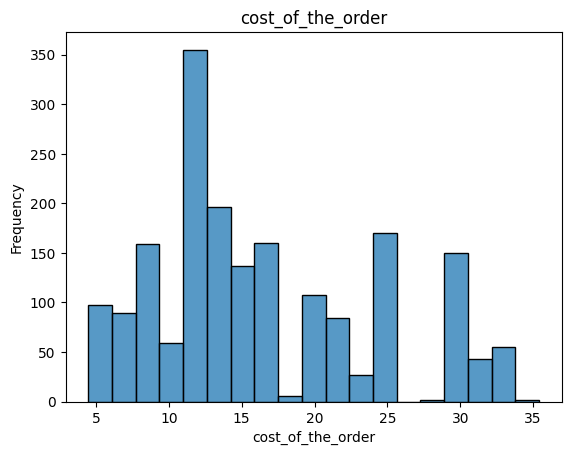

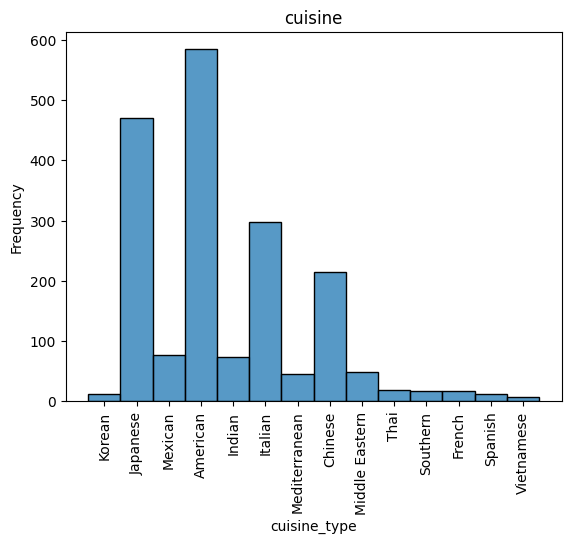

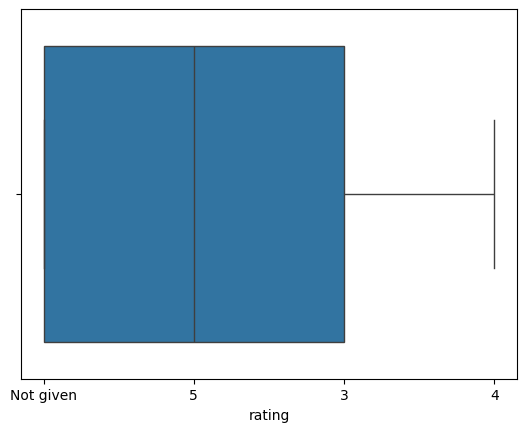

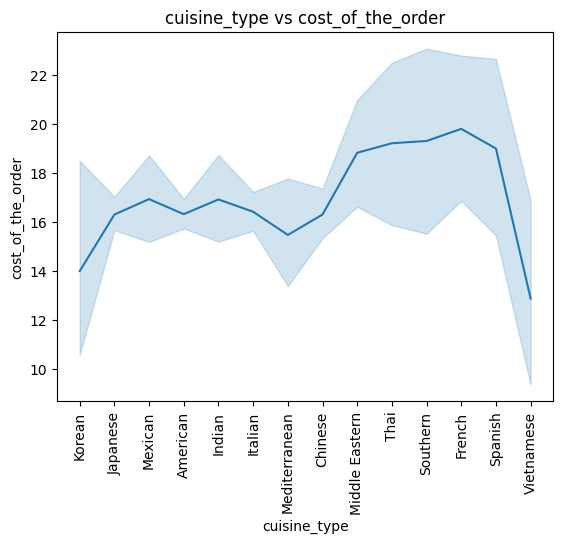

In [ ]:
# Write the code here
sns.histplot(data=foodhub, x='cost_of_the_order')
plt.title('cost_of_the_order')
plt.xlabel('cost_of_the_order')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=foodhub, x='cuisine_type')
plt.title('cuisine')
plt.xlabel('cuisine_type')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

sns.boxplot(data=foodhub, x='rating')
plt.show()

sns.lineplot(data=foodhub, x='cuisine_type', y='cost_of_the_order')
plt.title('cuisine_type vs cost_of_the_order')
plt.xlabel('cuisine_type')
plt.xticks(rotation=90)
plt.ylabel('cost_of_the_order')
plt.show()





### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
# In the restuarant_name column repeated numbers of repeated restuarant names has been counted in the following snnipet
top_5_restaurants = foodhub['restaurant_name'].value_counts().head(5)
print("--TOP 5 RESTUARNTS--")
print(top_5_restaurants)

--TOP 5 RESTUARNTS--
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
# in the following snnipet python is comparing and calculating between the day_of_the_week colunm and cuisine_type column
pop_cuisine_weekend = foodhub[foodhub['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()
print(f"The most popular cuisine on weekends is::: {pop_cuisine_weekend}")


The most popular cuisine on weekends is::: American


#### Observations:
Looks like American Cuisine is the most popular one

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here

# Count total number of orders
total_orders = len(foodhub)

# Count orders where cost is more than 20
orders_over_20 = len(foodhub[foodhub['cost_of_the_order'] > 20])

# Calculate percentage
percentage = (orders_over_20 / total_orders) * 100

print(f"{percentage:.2f}% of the orders cost more than $20.")

29.24% of the orders cost more than $20.


#### Observations:
29.24% of the orders cost more than $20.      

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
mean_delivery_time = foodhub['delivery_time'].mean()
print(f"The mean order delivery time is::: {mean_delivery_time} minutes")

The mean order delivery time is::: 24.161749209694417 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
# following snnipet picked the repeated customer_id from the customer_id column and gave us the total orders placed by these customer.
top3_customers = foodhub['customer_id'].value_counts().head(3)
print("---Top 3 most frequent customers---")
print(top3_customers)

---Top 3 most frequent customers---
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


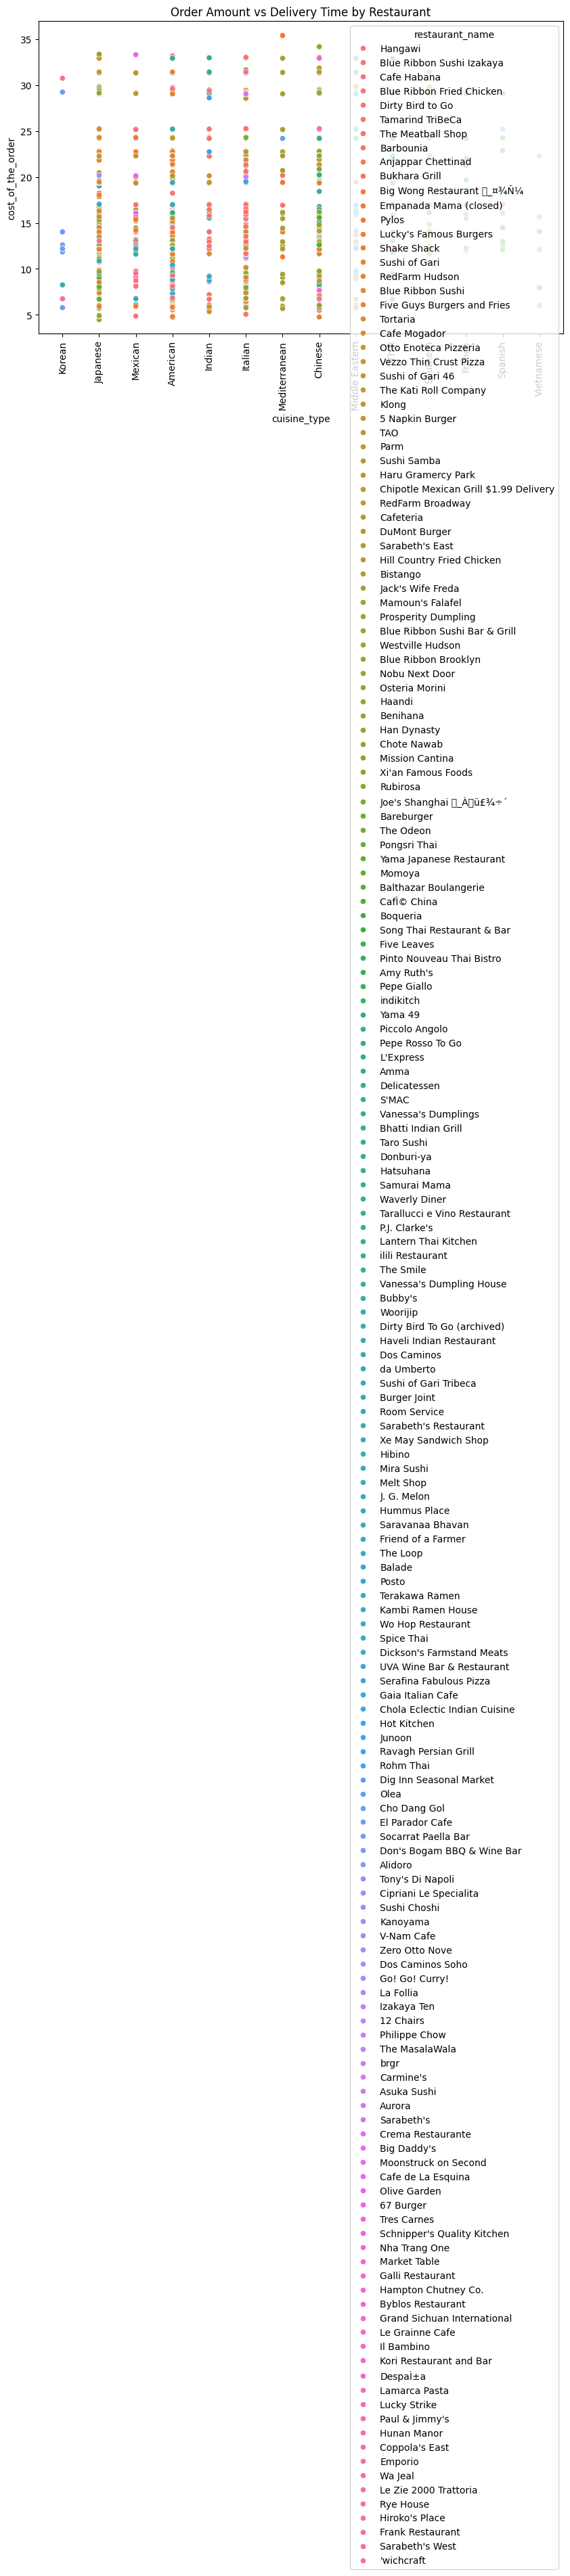

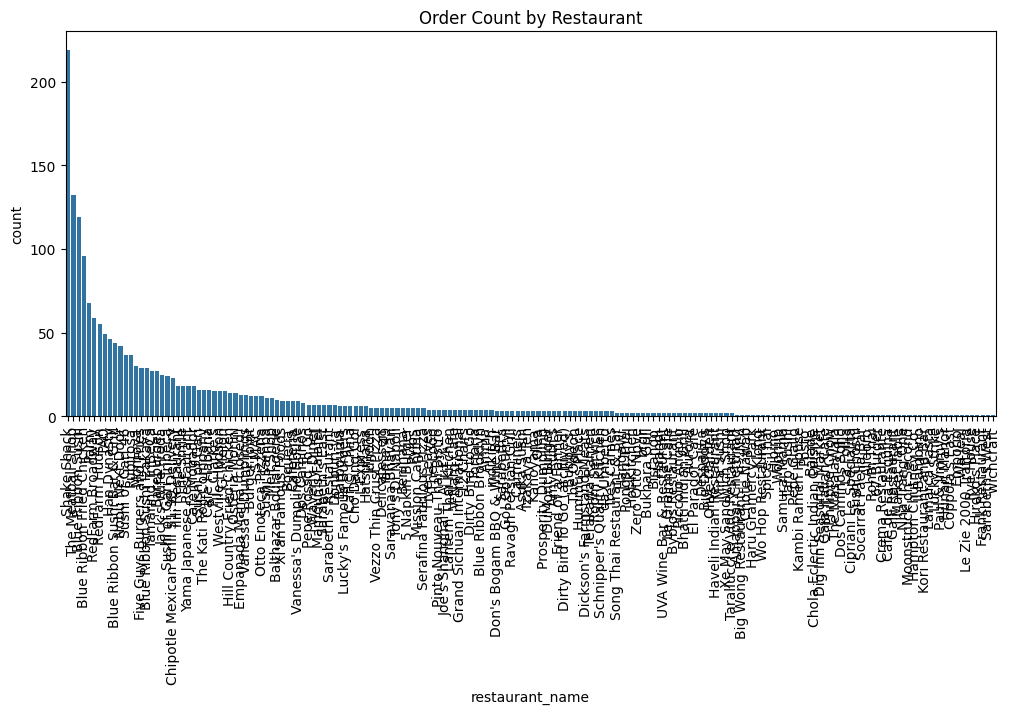

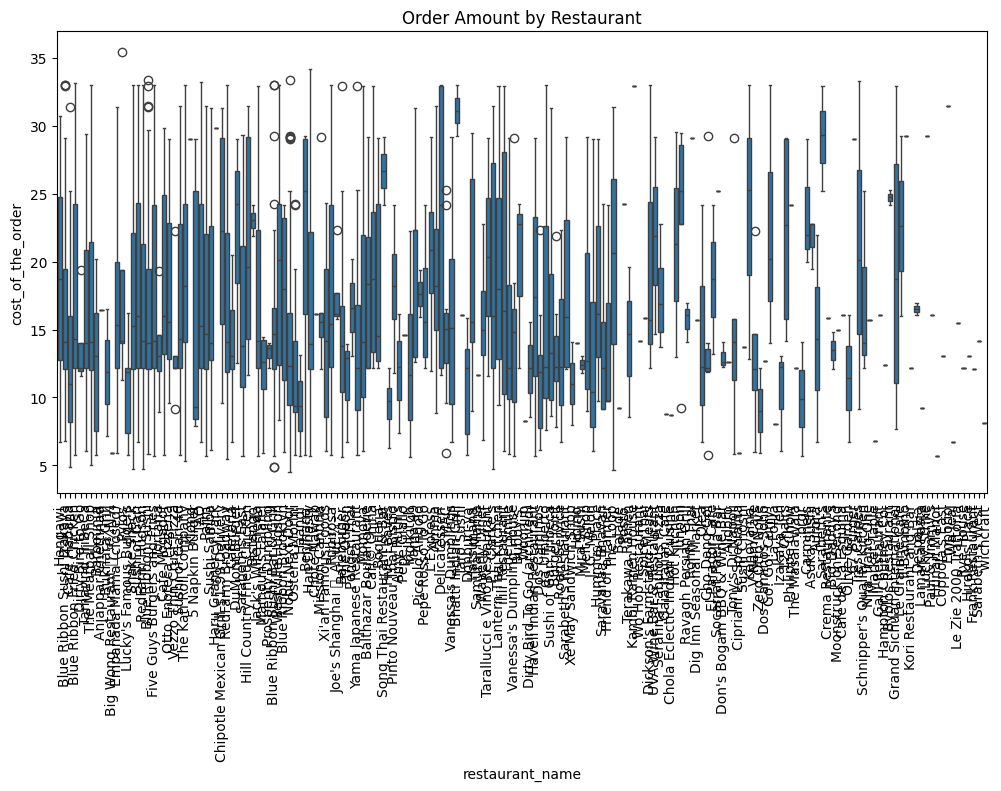

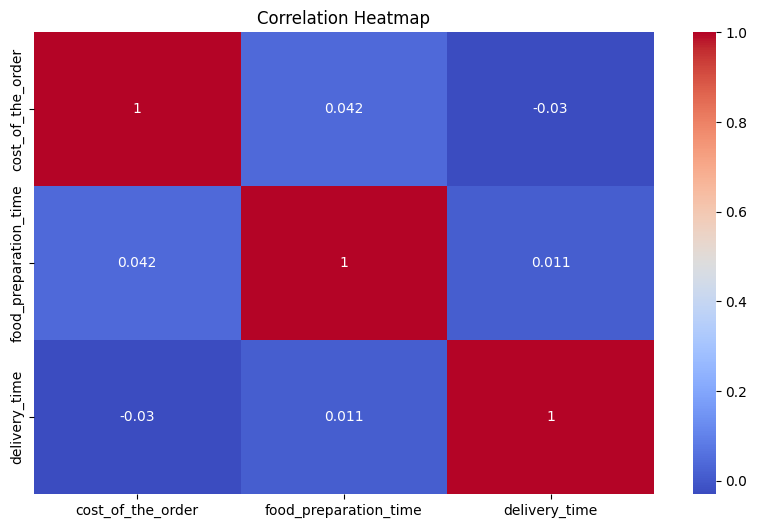

In [ ]:
# Write the code here
# Scatter Plot: Order Amount vs Delivery Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cuisine_type', y='cost_of_the_order' ,hue='restaurant_name', data=foodhub)
plt.xticks(rotation=90)
plt.title('Order Amount vs Delivery Time by Restaurant')
plt.show()


#Count Plot: Number of Orders per Restaurant

plt.figure(figsize=(12, 5))
sns.countplot(x='restaurant_name', data=foodhub, order=foodhub['restaurant_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Order Count by Restaurant')
plt.show()


# Boxplot : Order Amount by Restaurant

plt.figure(figsize=(12, 6))
sns.boxplot(x='restaurant_name', y='cost_of_the_order', data=foodhub)
plt.xticks(rotation=90)
plt.title('Order Amount by Restaurant')
plt.show()

# Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(data=foodhub[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# Convert the 'rating' column to numeric, coercing errors (non-numeric values like 'Not given' become NaN)
foodhub['rating'] = pd.to_numeric(foodhub['rating'], errors='coerce')

# Calculate rating count and average rating for each restaurant
# I am using foodhub directly here, and the mean calculation will ignore the NaN values introduced by coerce
restaurant_stats = foodhub.groupby('restaurant_name')['rating'].agg(rating_count='count', average_rating='mean').reset_index()

rating_count_threshold = 50
average_rating_threshold = 4.0

# Filter the restaurant_stats DataFrame based on the calculated metrics
qualified_restaurants_stats = restaurant_stats[
    (restaurant_stats['rating_count'] > rating_count_threshold) &
    (restaurant_stats['average_rating'] > average_rating_threshold)
]

# Print the names of the qualified restaurants
print("-------Restaurants fulfilling the criteria for the promotional offer-------")
print(qualified_restaurants_stats['restaurant_name'].unique())

-------Restaurants fulfilling the criteria for the promotional offer-------
['Blue Ribbon Fried Chicken' 'Blue Ribbon Sushi' 'Shake Shack'
 'The Meatball Shop']


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
#Commission Rules:
#25% for orders > $20
#15% for orders > $5 and ≤ $20
#0% for orders ≤ $5

def calculate_commission(amount):
    if amount > 20:
        return amount * 0.25
    elif amount > 5:
        return amount * 0.15
    else:
        return 0
foodhub['commission'] = foodhub['cost_of_the_order'].apply(calculate_commission)


total_revenue = foodhub['commission'].sum()
print(f"Total revenue generated by the company is ${total_revenue:.2f}")

Total revenue generated by the company is $6166.30


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

# Convert food_preparation_time and delivery_time to numeric, coercing errors
foodhub['food_preparation_time'] = pd.to_numeric(foodhub['food_preparation_time'], errors='coerce')
foodhub['delivery_time'] = pd.to_numeric(foodhub['delivery_time'], errors='coerce')

# Calculate the total time required by summing food_preparation_time and delivery_time
# This addition should now work as the columns are numeric
foodhub['total_delivery_time'] = foodhub['food_preparation_time'] + foodhub['delivery_time']

# Count orders with total delivery time > 60 minutes
orders_over_60_minutes = len(foodhub[foodhub['total_delivery_time'] > 60])

# Calculate the percentage
total_orders = len(foodhub)
percentage_over_60 = (orders_over_60_minutes / total_orders) * 100

print(f"{percentage_over_60:.2f}% of orders took more than 60 minutes to get delivered from the time the order is placed.")



10.54% of orders took more than 60 minutes to get delivered from the time the order is placed.


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
# Converting food_preparation_time and delivery_time to numeric, coercing errors
foodhub['delivery_time'] = pd.to_numeric(foodhub['delivery_time'], errors='coerce')


# Calculating the mean delivery time for weekdays and weekends using the 'day_of_the_week' column
mean_delivery = foodhub.groupby('day_of_the_week')['delivery_time'].mean()
print(mean_delivery)




day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]


### Conclusions:
1. Top Restaurants are
Shake Shack                 
The Meatball Shop           
Blue Ribbon Sushi           
Blue Ribbon Fried Chicken  
2. Amrican cuisine is most popular one .
3. 29.24% of the orders cost more than $20.
4. Total revenue generated by the Food aggregrator company is $6166.30
5. In weekends delivery time is less than weekdays.
6.10.54% of orders took more than 60 minutes to get delivered from the time the order is placed.

### Recommendations:

*  From the above analysis If a Restaurant provides American cuisine with affordable price and food quality with fastest delivery service can have good opportunities


In [ ]:
!jupyter nbconvert --to html "/content/PYF_Project_LearnerNotebook_FullCode.ipynb"


[NbConvertApp] WARNING | pattern '/content/PYF_Project_LearnerNotebook_FullCode.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Jupyter

---